In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("C:/Users/bodya/Downloads/Movies_and_TV.csv", header = None, names=['item-id', 'user-id', 'rating', 'timestamp'])
dataset

,item-id,user-id,rating,timestamp
0,0001527665,A3478QRKQDOPQ2,5.0,1362960000
1,0001527665,A2VHSG6TZHU1OB,5.0,1361145600
2,0001527665,A23EJWOW1TLENE,5.0,1358380800
3,0001527665,A1KM9FNEJ8Q171,5.0,1357776000
4,0001527665,A38LY2SSHVHRYB,4.0,1356480000
...,...,...,...,...
8765563,B01HJ6R77G,A29XKBB6SEYTN6,5.0,1491955200
8765564,B01HJ6R77G,ASEBX8TBYWQWA,4.0,1472515200
8765565,B01HJCCLOY,AK4XZBLSY1WC9,1.0,1495584000
8765566,B01HJCCLOY,AK19IXB9I4175,3.0,1492041600


In [3]:
# Group by User and Item, then take the MEAN of the rating
# This automatically drops the 'timestamp' column as it's no longer relevant
dataset = dataset.groupby(['user-id', 'item-id'], as_index=False).agg({
    'rating': 'mean' 
})

print("Duplicates handled by Averaging.")
print(f"New shape: {dataset.shape}")

Duplicates handled by Averaging.
New shape: (8506849, 3)


In [5]:
dataset

,user-id,item-id,rating
0,A00013803RVZPCZKTT9U,B003ZTNT2Y,1.0
1,A0001392IVCRENBEIEYS,6302409365,5.0
2,A0001598OL7FAN6XNMK9,B00BMRTPEM,5.0
3,A0001598OL7FAN6XNMK9,B00IV3FLO8,4.0
4,A0001598OL7FAN6XNMK9,B00OGL6S64,5.0
...,...,...,...
8506844,AZZZOVIBXHGDR,B0063FQREO,5.0
8506845,AZZZQEK5E6KN,B001HB3PMQ,3.0
8506846,AZZZVKYVCQXEO,B00NJ4UZI6,5.0
8506847,AZZZX50NWEFU,B00GJFX8TA,5.0


In [6]:
# Calculate unique counts and total length (Prepared dataset)
num_users = dataset['user-id'].nunique()
num_items = dataset['item-id'].nunique()
num_ratings = len(dataset)
print(f"Total Ratings: {num_ratings:,}")
print(f"Unique Users:  {num_users:,}")
print(f"Unique Items:  {num_items:,}")

Total Ratings: 8,506,849
Unique Users:  3,826,085
Unique Items:  182,032


In [8]:
import pandas as pd

top_items_ids = dataset['item-id'].value_counts().nlargest(10000).index
dataset = dataset[dataset['item-id'].isin(top_items_ids)]

top_users_ids = dataset['user-id'].value_counts().nlargest(100000).index
dataset = dataset[dataset['user-id'].isin(top_users_ids)]

print(f"Stats after filtering:")
print(f"Users: {dataset['user-id'].nunique()}")
print(f"Items: {dataset['item-id'].nunique()}")
print(f"Ratings: {current_ratings_count}")

Stats after filtering:
Users: 100000
Items: 9999
Ratings: 1523627


In [9]:
# The dataset is already in the format of 1 -> 5 but we will double check
min_r, max_r = dataset["rating"].min(), dataset["rating"].max()
min_r, max_r
""" optional
min_r, max_r = df["rating"].min(), df["rating"].max()
df["rating"] = 1 + 4 * (df["rating"] - min_r) / (max_r - min_r)
"""

' optional\nmin_r, max_r = df["rating"].min(), df["rating"].max()\ndf["rating"] = 1 + 4 * (df["rating"] - min_r) / (max_r - min_r)\n'

In [10]:
# number of ratings per each user 
n_u = dataset.groupby("user-id")["rating"].count()
n_u.to_csv("number_of_ratings_for_each_user.csv")
n_u.head()

user-id
A0040548BPHKXMHH3NTI    12
A0045750NMY09KVSTE01     7
A0070287EH1P1FHWO3GW    10
A0149220O8WD7KG3O5XR    18
A0160612BLIWRHROHLLE     7
Name: rating, dtype: int64

In [11]:
# number of ratings for each item
n_i = dataset.groupby("item-id")["rating"].count()
n_i.to_csv("number_of_ratings_for_each_item.csv")
n_i.head()

item-id
0005019281    186
0005119367    140
0307142493     90
0375810331     45
0510539610      9
Name: rating, dtype: int64

In [12]:
# average ratings per user
r_u = dataset.groupby("user-id")["rating"].mean()
r_u.to_csv("average_rating_per_user.csv")
r_u.head()

user-id
A0040548BPHKXMHH3NTI    4.083333
A0045750NMY09KVSTE01    5.000000
A0070287EH1P1FHWO3GW    4.600000
A0149220O8WD7KG3O5XR    4.500000
A0160612BLIWRHROHLLE    4.142857
Name: rating, dtype: float64

In [13]:
# average rating per item
r_i = dataset.groupby("item-id")["rating"].mean()
r_i.to_csv("average_rating_per_item.csv")
r_i.head()

item-id
0005019281    4.494624
0005119367    4.764286
0307142493    4.766667
0375810331    4.511111
0510539610    4.333333
Name: rating, dtype: float64

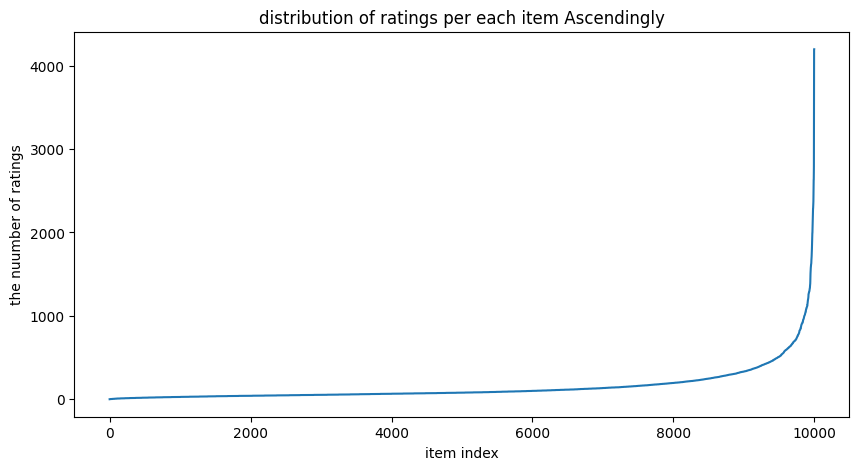

In [14]:
import matplotlib.pyplot as plt
# ordered the total number of products based on their average ratings 
items_ordered = n_i.sort_values(ascending=True)
items_ordered.to_csv("ordered_items_counts.csv")

plt.figure(figsize=(10,5))
plt.plot(items_ordered.values)
plt.title("distribution of ratings per each item Ascendingly")
plt.xlabel("item index")
plt.ylabel("the nuumber of ratings")
plt.show()

In [15]:
"""
n__i = n_i.sort_values(ascending=True)
n__i
"""


'\nn__i = n_i.sort_values(ascending=True)\nn__i\n'

In [16]:
# calcaulate number of products based on their average ratings
r_i_pct =(r_i - 1) / 4 * 100
bins = [0,1,5,10,20,30,40,50,60,70,100]
labels = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10']
groups = pd.cut(r_i_pct, bins=bins, labels=labels, include_lowest=True)
groups.to_csv("item_rating_groups.csv")
groups.value_counts()

rating
G10    8293
G9      980
G8      436
G7      165
G6       86
G5       28
G4       11
G1        0
G2        0
G3        0
Name: count, dtype: int64

In [17]:
#Total Number of ratings per group
group_count_by_index = groups.value_counts().sort_index(ascending = True)
group_count_by_index.to_csv("group_counts_index.csv")
group_count_by_index

rating
G1        0
G2        0
G3        0
G4       11
G5       28
G6       86
G7      165
G8      436
G9      980
G10    8293
Name: count, dtype: int64

In [18]:
# oredered ascendingly
item_group = pd.DataFrame({"item-id": r_i.index, "group": groups.values})
merged = dataset.merge(item_group, on="item-id")
ratings_per_group = merged.groupby("group", observed=False)["rating"].count().sort_index()
ratings_per_group.to_csv("ratings_per_group.csv")
ratings_per_group

group
G1           0
G2           0
G3           0
G4         544
G5        2129
G6        6536
G7       15758
G8       54685
G9      168567
G10    1275408
Name: rating, dtype: int64

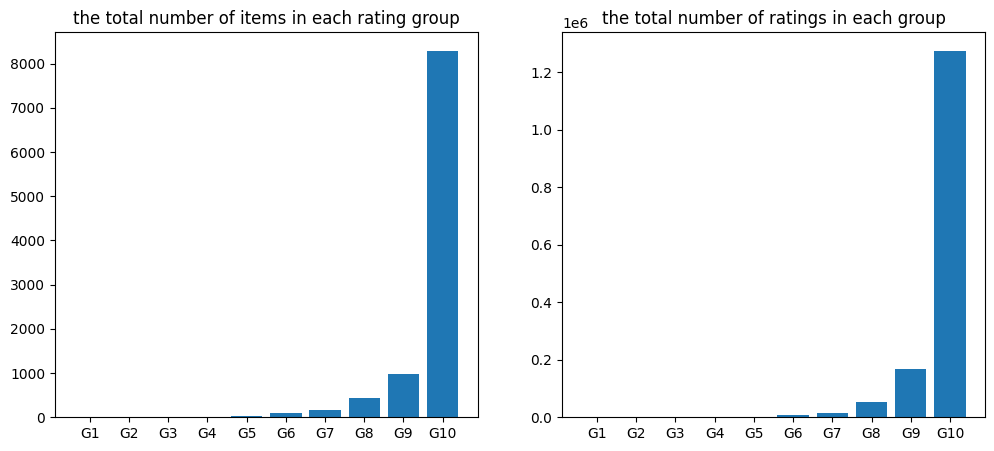

In [19]:

#plotted
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(group_count_by_index.index, group_count_by_index.values)
plt.title("the total number of items in each rating group")

plt.subplot(1,2,2)
plt.bar(ratings_per_group.index, ratings_per_group.values)
plt.title("the total number of ratings in each group")

plt.show()

In [20]:
# select the user targeted
user_percentage = n_u / n_u.max()  * 100
safe = lambda s: s.index[0] if len(s) else None
U1 = safe(user_percentage[user_percentage <= 2])
U2 = safe(user_percentage[(user_percentage > 2) & (user_percentage <= 5)])
U3 = safe(user_percentage[(user_percentage > 5) & (user_percentage <= 10)])
the_target_users = [u for u in [U1, U2, U3] if u is not None]
print(f"Target Users: {the_target_users}")

Target Users: ['A0040548BPHKXMHH3NTI', 'A100JCBNALJFAW', 'A10175AMUHOQC4']


In [21]:
# Traget items
sorted_items = r_i.sort_values(ascending=True)
I1, I2 = sorted_items.index[:2]
the_target_items = [I1, I2]
the_target_items

['B00PCSVODW', 'B005GISDXW']

In [22]:
#count number between co-rated users between each and target
targets_users = [u for u in the_target_users if u is not None]
targets_items = [t for t in the_target_items if t is not None]
user_items = dataset.groupby("user-id")["item-id"].apply(set)
item_users = dataset.groupby("item-id")["user-id"].apply(set)
No_common_users = {}
for u in targets_users:
    No_common_users[u] = {other: len(user_items[u] & user_items[other])
                          for other in user_items.index if other != u}
No_coRated_items = {}
for it in targets_items:
    No_coRated_items[it] = {other: len(item_users[it] & item_users[other])
                            for other in item_users.index if other != it}
No_common_users, No_coRated_items

({'A0040548BPHKXMHH3NTI': {'A0045750NMY09KVSTE01': 0,
   'A0070287EH1P1FHWO3GW': 0,
   'A0149220O8WD7KG3O5XR': 0,
   'A0160612BLIWRHROHLLE': 0,
   'A0221881VJG1DV9M63H2': 1,
   'A0283642BURXFWRSJIJT': 0,
   'A0293382VV3VQQ607PY4': 0,
   'A0322174KPHFYVAJWTR2': 0,
   'A0346431PV98JX8MFDKG': 0,
   'A0464351OZXPUPKGI6HO': 0,
   'A05308081UG71LSV3EE3': 0,
   'A05802985UN4SSZAWOCI': 0,
   'A0637833V7MU6VSMH5PE': 0,
   'A0675716UF1O1EERO8JI': 0,
   'A0685888WB02Q69S553P': 0,
   'A0718784TOWF9DX1DOFD': 1,
   'A0725659L4DQHV5NQC5C': 0,
   'A0769183K7L2H54MJRG4': 1,
   'A08161909WK3HU7UYTMW': 0,
   'A0817904HQMN5QXY2MTW': 1,
   'A08553752N7KUI4EWMNW': 0,
   'A0859025PHS4N7X4RFT3': 0,
   'A0896517PN4N2KMFUHMW': 0,
   'A0897547HGJQA5LSC6E5': 0,
   'A0933858UGQ2WIEV5EYS': 0,
   'A0978836QSB5X62PLBB8': 0,
   'A0986665A7J4V94FK3RZ': 1,
   'A1004AX2J2HXGL': 0,
   'A1004HZ4AR10UI': 0,
   'A10090497ELQ2XP1YB3I': 0,
   'A1009LH3UAC3P': 0,
   'A100BBKBDGGRHV': 1,
   'A100GZ77D21HTZ': 0,
   'A100JCBNALJFA

In [23]:
item_users = dataset.groupby("item-id")["user-id"].apply(set)
user_items = dataset.groupby("user-id")["item-id"].apply(set)
number_of_common_users = {}
for user in the_target_users:
    target_set = user_items[u]
    relevant_users = set()
    for item in target_set:
        relevant_users.update(item_users[item])
    relevant_users.discard(user)
    number_of_common_users[user] = {
        other: len(target_set & user_items[other])
        for other in relevant_users
    }
number_of_common_items = {}
for item in targets_items:
    target_set = item_users[item]
    relevant_items = set()
    for user in target_set:
        relevant_items.update(user_items[user])
    relevant_items.discard(item)
    number_of_common_items[item] = {
        other: len(target_set & item_users[other])
        for other in relevant_items
    }

In [24]:
number_of_common_users , number_of_common_items

({'A0040548BPHKXMHH3NTI': {'A24BVOQ3OJ3HBL': 1,
   'A1GVA2HN1RONVK': 1,
   'A1MRA1WAUYLRV1': 2,
   'AFOI8LFZOXMFX': 4,
   'A591NQ8VDT9CF': 1,
   'A37U7YMXA5T1FB': 1,
   'A2VNLHVUZ7NLY9': 1,
   'A3JDWULJ9VX2IS': 3,
   'AHS5HBSOYHV8O': 1,
   'A3OEKEAZ08OQRB': 1,
   'A39QUM4IZELJFF': 1,
   'A1GJ1X60091MW7': 1,
   'A3F7PFUP4BDG3K': 1,
   'A1W3I7TZE3T4CB': 1,
   'A1H6448AVRAGYS': 3,
   'A3800R2T2D6DJL': 1,
   'AYKBC055ZUDNM': 1,
   'A136N0UXTX6P38': 1,
   'A2L46AZHPG7VCT': 5,
   'A2AECIRU39XM26': 2,
   'A2D8Y3E78YNK2V': 1,
   'A3RW8DBL2J7XAW': 1,
   'A1YUFFEXUNHNPT': 3,
   'A2ZS14Z1KT5SI4': 3,
   'A2SNLNE0PCB7BC': 1,
   'ARWK9UPHTCRS8': 1,
   'A20K55S0HWXPI3': 2,
   'A1BPC3LPCYB50Y': 3,
   'A1L2HTX451W609': 1,
   'A1EMZ7G0X5YTLM': 1,
   'A2EXKBPH81DLHU': 2,
   'A2VBZ82XPBU0XK': 1,
   'A38RH4YZS8MKB': 1,
   'A1XH60788V4Y2G': 1,
   'A26RQZ6BHZDZA0': 1,
   'A51DWA4NM73FR': 3,
   'A2UXY1WIXPTN9': 1,
   'AOPEJTX5PH2N5': 1,
   'A2IG9MKMN5VJR': 3,
   'A1NDS0QITSYUBW': 1,
   'AO5R0059V2JM9': 1,
   

In [25]:
# determine threshold beta
threshold_users = {}
for u in the_target_users:
    u_items = len(user_items[u])
    limit = 0.30 * u_items
    threshold_users[u] = [
        other for other, overlap in number_of_common_users[u].items()
        if overlap >= limit
    ]
threshold_users

{'A0040548BPHKXMHH3NTI': ['AFOI8LFZOXMFX',
  'A2L46AZHPG7VCT',
  'A1GK229ZY4QLWJ',
  'A2H3JURQZOHVMB',
  'A4W1510KA2B69',
  'A13SV5R32D27W5',
  'A1X5SHBAAHF3LS',
  'A1LV1W45P7OYAM',
  'A1FD0IYA6RDEPG',
  'AU3L7YGYNHTWV',
  'A6PVU6L1LJIF0',
  'A3CQ3N6AG0DN0J',
  'A2CNRFKA1KOGYJ',
  'A3MHX1DPO1GUX9',
  'A2KAVTXN21ZCDZ',
  'A3W3LCVPTB133O',
  'A29ANRYJ09M424',
  'A3DHT4W3LHKSY1',
  'A3MN747KCKU0PT',
  'A3MKLME10UMVHV',
  'A3I10JD1AV5G7V',
  'A1RA72BFGJUGW5',
  'A3QU3O79AGNWCY',
  'A2DOY1YSP78J1W',
  'A1OTICLMB8KVBX',
  'A2VY14UM461SW',
  'ABQUJ3Z6EP5GN',
  'A1L46HSISUIDB4',
  'A1W25VOT89B3MN',
  'A27BM6V8ZCPFTP',
  'A39JXRPGDZQDGA',
  'A1ALE4VY2XZ29H',
  'A32V6BYPBIV2JM',
  'A2VEZLMVGX8G7O',
  'A3U4BVIEJNCJ91',
  'A12Y4W9GLT4IC',
  'A24CFOYIVQWM7I',
  'A9FHZGXN2PXDF',
  'A3SS6VRWCTB7V',
  'AAU24UCCQ27YJ',
  'A4KUVVASX10TY',
  'AIK7I9BYWV9Q1',
  'A204BIC57ZTZVJ',
  'A3UYVIEQFMUQNP',
  'A35TYU9JO0BBZ7',
  'A2A6NH6DPE0VXR',
  'AIG9BO57K9359',
  'AUWUHBDBD7B6D',
  'AUTUYKL8525WP',
  'A1DJLUH6

In [27]:
import pickle

art = {
    "dataset":dataset,
    "number_of_ratings_for_each_user_(n_u)": n_u,
    "number_of_ratings_for_each_item_(n_i)": n_i,
    "average_rating_per_user_(r_u)": r_u,
    "average_rating_per_item_(r_i)": r_i,
    "ordered_items_counts": items_ordered,
    "item_rating_groups_(groups)": groups,
    "group_count_by_index_(group_count)": group_count_by_index,
    "ratings_per_group": ratings_per_group,
    "targets_users": the_target_users,
    "targets_items": the_target_items,
    "number_of_common_users": number_of_common_users,
    "number_of_common_items": number_of_common_items,
    "threshold_users": threshold_users
}
with open("Statistical_Analysis/statistical_analysis.pkl", "wb") as f:
    pickle.dump(art, f)